# Pairwise disorder comparison between effectors and reference proteomes - Disopred

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob


import sys
sys.path.append('../src/')

import aepathdisorder

%matplotlib inline

In [2]:
# Load maps
bug_map = aepathdisorder.load_map('../data/maps/reference_taxa.json')
CR_map = aepathdisorder.load_map('../data/maps/CR_taxa.json')
EHEC_map = aepathdisorder.load_map('../data/maps/EHEC_taxa.json')
EPEC_map = aepathdisorder.load_map('../data/maps/EPEC_taxa.json')

# Load Disopred results
bug_disopred = glob.glob('../data/disopred/proteomes/*.table')
EHEC_disopred = glob.glob('../data/disopred/EHEC_effectors/*.table')
EPEC_disopred = glob.glob('../data/disopred/EPEC_effectors/*.table')
CR_disopred = glob.glob('../data/disopred/CR_effectors/*.table')
#human_cat_short = glob.glob('../data/iupred_aggregated_disfrac-class/human_proteome/*short*.table')



In [3]:
#human_df = concatenate_results(human_disopred)
bug_df = aepathdisorder.concatenate_results(bug_disopred)
EHEC_df = aepathdisorder.concatenate_results(EHEC_disopred)
EPEC_df = aepathdisorder.concatenate_results(EPEC_disopred)
CR_df = aepathdisorder.concatenate_results(CR_disopred)

effector_types = ['EHEC', 'EPEC', 'CR']
effector_dfs = [EHEC_df, EPEC_df, CR_df]
effector_maps = [EHEC_map, EPEC_map, CR_map]

for df, mapdict in zip(effector_dfs, effector_maps):
    #df.drop(['dataset'], axis=1,  inplace=True)
    df['dataset'] = df['protein_ac'].map(mapdict)
    df['collection_type'] = 'Effector'

for df, effector_type in zip(effector_dfs, effector_types):
    df['effector_type'] = effector_type
# Make bug taxa strings (stored as int)
bug_df['dataset'] = bug_df['dataset'].astype(str)
# Define references as such
bug_df['collection_type'] = 'Reference'

merged_effector_df = pd.concat(effector_dfs)


In [4]:
merged_effector_df.columns

Index(['protein_ac', 'dataset', 'disopred-pb_ratio', 'disopred-pb_motif_occ',
       'disopred-pb_motif_density', 'overall_motif_density',
       'motif_occ_disopred_density', 'motif_occ_overall_density',
       'collection_type', 'effector_type'],
      dtype='object')

In [5]:
bug_efftype_map = {}
for k, v in bug_map.items():
    bug_efftype_map[k] = v['type']

bug_efftype_map

{'244319': 'EHEC',
 '362663': 'UPEC',
 '574521': 'EPEC',
 '585395': 'EHEC',
 '585396': 'EHEC',
 '637910': 'CR',
 '83334': 'EHEC'}

In [6]:
effector_taxa  = set(merged_effector_df['dataset'])
reference_taxa = set(bug_df['dataset'])

paired_taxa = effector_taxa & reference_taxa

paired_effectors = merged_effector_df[merged_effector_df['dataset'].isin(paired_taxa)]
paired_bugs = bug_df[bug_df['dataset'].isin(paired_taxa)]

In [7]:
paired_bugs['effector_type'] = paired_bugs['dataset'].map(bug_efftype_map) 

In [8]:
final_df = pd.concat([paired_effectors, paired_bugs], ignore_index=True)
final_df.reset_index(inplace=True)
# Drop effectors from Reference collections
final_df = final_df.sort_values(by='collection_type').drop_duplicates(subset='protein_ac')

In [9]:
final_df.sample(10)

,index,protein_ac,dataset,disopred-pb_ratio,disopred-pb_motif_occ,disopred-pb_motif_density,overall_motif_density,motif_occ_disopred_density,motif_occ_overall_density,collection_type,effector_type
10797,10797,D2TJI1,637910,0.075377,5,0.700000,0.052764,0.012563,NaN,Reference,CR
5207,5207,B7UKL9,574521,0.040964,1,0.294118,0.012048,0.002410,NaN,Reference,EPEC
7563,7563,B7UFH1,574521,0.061840,10,0.853659,0.052790,0.015083,NaN,Reference,EPEC
443,443,Q8X5Y5,83334,0.138614,17,0.732143,0.101485,0.042079,NaN,Reference,EHEC
4805,4805,A0A0H3JID2,83334,0.144385,16,0.740741,0.106952,0.042781,NaN,Reference,EHEC
776,776,Q8XB02,83334,0.058333,3,0.476190,0.027778,0.008333,NaN,Reference,EHEC
13194,13194,D2TP63,637910,0.000000,0,0.000000,0.000000,0.000000,NaN,Reference,CR
884,884,P0AEF2,83334,0.028571,0,0.000000,0.000000,0.000000,NaN,Reference,EHEC
14286,14286,D2TQP6,637910,0.379630,5,0.341463,0.129630,0.046296,NaN,Reference,CR
9095,9095,B7UH68,574521,0.106250,0,0.000000,0.000000,0.000000,NaN,Reference,EPEC


In [10]:
import seaborn as sns

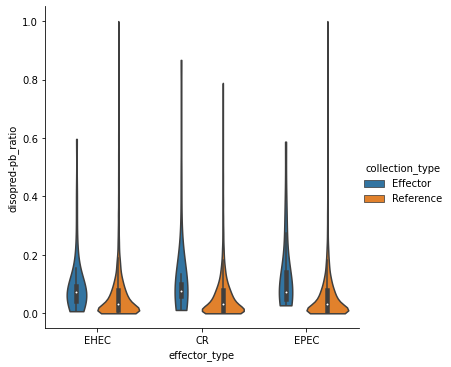

In [11]:
sns.catplot(
    x='effector_type',
    y='disopred-pb_ratio',
    hue='collection_type',
    data=final_df,
    kind='violin',
    cut=0)

#x1, x2 = -0.2, 0.2   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
#y, h, col = final_df['disorder_fraction'].max() + 0.05, 0.05, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, y+(1.25*h), "0.38039", ha='center', va='bottom', color=col)

plt.savefig('../figures/pairwise_disopred-pb.png',
            dpi=300)

In [12]:
from scipy.stats import mannwhitneyu

In [13]:
print('Group\tp-value')
for gp, df in final_df.groupby('effector_type'):
    ref = df[df['collection_type']=='Reference']['disopred-pb_ratio']
    eff = df[df['collection_type']=='Effector']['disopred-pb_ratio']
    stat, pval = mannwhitneyu(x=ref, y=eff, alternative='less')
    print(gp, '\t', f'{pval:0.5f}')

Group	p-value
CR 	 0.00004
EHEC 	 0.00008
EPEC 	 0.00004


In [14]:
for taxon in paired_taxa:
    print(taxon, bug_map[taxon])

83334 {'name': 'E. coli O157:H7', 'type': 'EHEC', 'uniprot_reference': 'UP000000558', 'PAI': ['NC_002695_P2', 'NC_002655_P5']}
637910 {'name': 'Citrobacter rodentium (strain ICC168)', 'type': 'CR', 'uniprot_reference': 'UP000001889', 'PAI': ['']}
574521 {'name': 'E. coli O127:H6', 'type': 'EPEC', 'uniprot_reference': 'UP000008205', 'PAI': ['AF022236']}


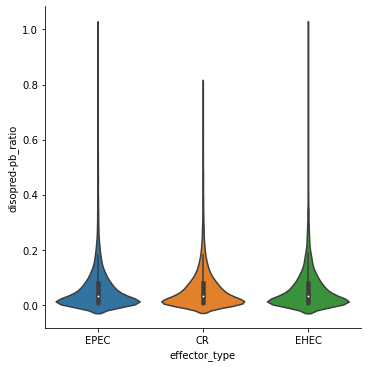

In [15]:
sns.catplot(
    x='effector_type',
    y='disopred-pb_ratio',
    data=final_df[final_df['collection_type']=='Reference'],
    kind='violin')